## **Librerías**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from keras import layers, models
from keras.datasets import reuters
from keras.utils import to_categorical

In [54]:
from sklearn.metrics import classification_report, confusion_matrix

## **Datos**

In [3]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

2110848/2110848 [==============================] - 0s 0us/step


In [4]:
word_index = reuters.get_word_index()
word_index = dict([(value, key) for (key, value) in word_index.items()])

550378/550378 [==============================] - 0s 0us/step


In [5]:
def vectorizar(sequences, dim=10000):
  results = np.zeros((len(sequences), dim))
  for i, sequences in enumerate(sequences):
    results[i, sequences] = 1
  return results

In [6]:
X_train = vectorizar(train_data)
X_test = vectorizar(test_data)

In [7]:
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

## **Red Neuronal**

In [30]:
model = models.Sequential()

model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(
    optimizer='rmsprop',
    loss='categorical_crossentropy',
    metrics=['acc']
)

In [31]:
X_val = X_train[:1000]
partial_X_train = X_train[1000:]

y_val = y_train[:1000]
partial_y_train = y_train[1000:]

In [32]:
history = model.fit(
  partial_X_train,
  partial_y_train,
  epochs = 10,
  batch_size = 512,
  validation_data = (X_val, y_val)             
)

Epoch 1/10
16/16 [==============================] - 1s 29ms/step - loss: 2.6988 - acc: 0.4982 - val_loss: 1.8117 - val_acc: 0.6250
Epoch 2/10
16/16 [==============================] - 0s 19ms/step - loss: 1.4979 - acc: 0.6956 - val_loss: 1.3409 - val_acc: 0.7180
Epoch 3/10
16/16 [==============================] - 0s 16ms/step - loss: 1.0936 - acc: 0.7684 - val_loss: 1.1428 - val_acc: 0.7500
Epoch 4/10
16/16 [==============================] - 0s 16ms/step - loss: 0.8589 - acc: 0.8186 - val_loss: 1.0577 - val_acc: 0.7680
Epoch 5/10
16/16 [==============================] - 0s 16ms/step - loss: 0.6936 - acc: 0.8567 - val_loss: 0.9827 - val_acc: 0.7890
Epoch 6/10
16/16 [==============================] - 0s 18ms/step - loss: 0.5626 - acc: 0.8826 - val_loss: 0.9205 - val_acc: 0.8070
Epoch 7/10
16/16 [==============================] - 0s 16ms/step - loss: 0.4576 - acc: 0.9024 - val_loss: 0.8963 - val_acc: 0.8140
Epoch 8/10
16/16 [==============================] - 0s 17ms/step - loss: 0.3729 - a

In [33]:
# Guardamos los resultados de la perdida del modelo en entrenamiento y validación
history_dict = history.history

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

accuracy = history_dict['acc']
val_accuracy = history_dict['val_acc']

epoch = range(1, len(loss_values) + 1)

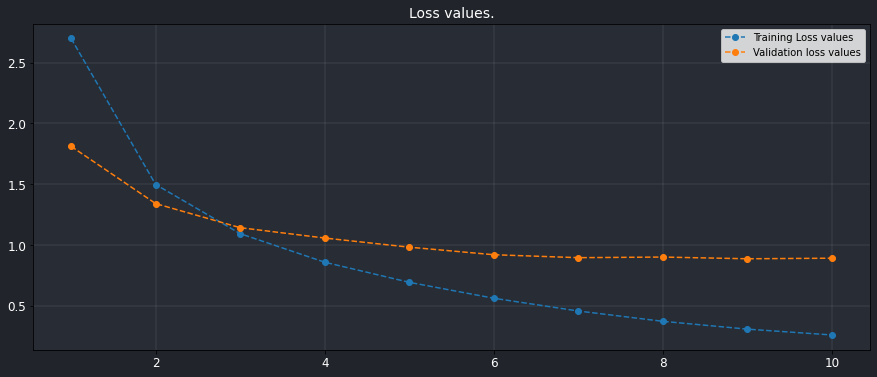

In [48]:
fig, ax = plt.subplots(figsize=(15, 6))

plt.title('Loss values.', size=14, color='white')
plt.grid(visible=True, linewidth=0.1, color='white')

fig.patch.set_facecolor('#21252b') 
ax.set_facecolor('#282c34') 

plt.plot(epoch, loss_values, 'o--', label='Training Loss values')
plt.plot(epoch, val_loss_values, 'o--', label='Validation loss values')

plt.xticks(color='white', size=12)
plt.yticks(color='white', size=12)

plt.legend()

plt.show()

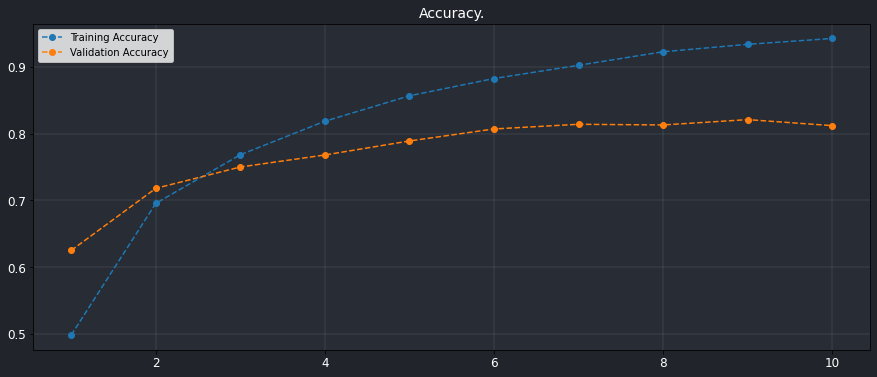

In [47]:
fig, ax = plt.subplots(figsize=(15, 6))

plt.title('Accuracy.', size=14, color='white')
plt.grid(visible=True, linewidth=0.1, color='white')

fig.patch.set_facecolor('#21252b') 
ax.set_facecolor('#282c34') 

plt.plot(epoch, accuracy, 'o--', label='Training Accuracy')
plt.plot(epoch, val_accuracy, 'o--', label='Validation Accuracy')

plt.xticks(color='white',size=12)
plt.yticks(color='white', size=12)

plt.legend()

plt.show()

In [36]:
model.evaluate(X_test, y_test)

71/71 [==============================] - 0s 3ms/step - loss: 1.0306 - acc: 0.7818


[1.0306233167648315, 0.7818343639373779]

In [49]:
predictions = model.predict(X_test)

71/71 [==============================] - 0s 2ms/step


In [67]:
predictions[0].max()

0.61145204

In [78]:
y_test_p = [np.argmax(i) for i in y_test]
y_pred = [np.argmax(i) for i in predictions]

In [83]:
print(classification_report(y_test_p, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.58      0.70        12
           1       0.65      0.82      0.73       105
           2       0.77      0.50      0.61        20
           3       0.94      0.92      0.93       813
           4       0.76      0.91      0.83       474
           5       0.00      0.00      0.00         5
           6       0.81      0.93      0.87        14
           7       1.00      0.33      0.50         3
           8       0.73      0.63      0.68        38
           9       0.85      0.68      0.76        25
          10       0.92      0.77      0.84        30
          11       0.49      0.81      0.61        83
          12       0.25      0.08      0.12        13
          13       0.56      0.62      0.59        37
          14       0.00      0.00      0.00         2
          15       0.50      0.11      0.18         9
          16       0.69      0.76      0.72        99
          17       1.00    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
